In [16]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import os

os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
plt.style.use(['science',"ieee"])

In [17]:
df = pd.read_csv('../data/Canada_Real_GDP.csv')
# df.plot(x='DATE', y='REAL GDP', title='Germany Real GDP Over Time')
# plt.show()

# Convert 'DATE' to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set 'DATE' as the index
df.set_index('DATE', inplace=True)

# Resample and sum up each year
annual_gdp = df.resample('YE').sum()

# Reset the index if you want 'DATE' back as a column
annual_gdp.reset_index(inplace=True)

# print(annual_gdp)

# annual_gdp.plot(x='DATE', y='REAL GDP', title='Germany Real GDP Over Time')
# # plt.show()

In [18]:
# Calculate year-over-year percentage change
annual_gdp['GDP Growth'] = annual_gdp['REAL GDP'].pct_change() * 100

# Split the data into pre-2008 and post-2008
pre_2008_growth = annual_gdp[annual_gdp['DATE'] < pd.to_datetime('2008-01-01')]['GDP Growth']
post_2008_data = annual_gdp[annual_gdp['DATE'] >= pd.to_datetime('2008-01-01')]
post_2008_growth = annual_gdp[annual_gdp['DATE'] >= pd.to_datetime('2008-01-01')]['GDP Growth']

# Calculate the average percentage growth for pre-2008
average_growth_pre_2008 = pre_2008_growth.mean()
print(average_growth_pre_2008)

average_growth_post_2008 = post_2008_growth.mean()
print(average_growth_post_2008)

# Get the last GDP value before 2008 as the base for projection
base_gdp = annual_gdp[annual_gdp['DATE'] < pd.to_datetime('2008-01-01')]['REAL GDP'].iloc[-1]

# Project future GDP values using the average growth rate from pre-2008
projected_growth = [base_gdp]
for i in range(1, len(post_2008_data) + 1):
    projected_growth.append(projected_growth[-1] * (1 + average_growth_pre_2008 / 100))

# Add projected growth to the post-2008 data DataFrame
post_2008_data['Projected GDP'] = projected_growth[1:]  # Exclude the initial base GDP value

post_2008_data[['DATE', 'REAL GDP', 'Projected GDP']]

3.034790370570919
1.6133968111338723


/var/folders/ht/3_9y5vps7wq413g4mxsyt5m80000gn/T/ipykernel_20490/4126225598.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_2008_data['Projected GDP'] = projected_growth[1:]  # Exclude the initial base GDP value


,DATE,REAL GDP,Projected GDP
37,2008-12-31,1847689.9,1.885000e+06
38,2009-12-31,1793828.2,1.942206e+06
39,2010-12-31,1849271.8,2.001148e+06
40,2011-12-31,1907287.1,2.061878e+06
41,2012-12-31,1940772.6,2.124452e+06
42,2013-12-31,1985911.3,2.188925e+06
43,2014-12-31,2042975.9,2.255354e+06
44,2015-12-31,2056254.5,2.323799e+06
45,2016-12-31,2077609.8,2.394322e+06
46,2017-12-31,2140641.1,2.466984e+06


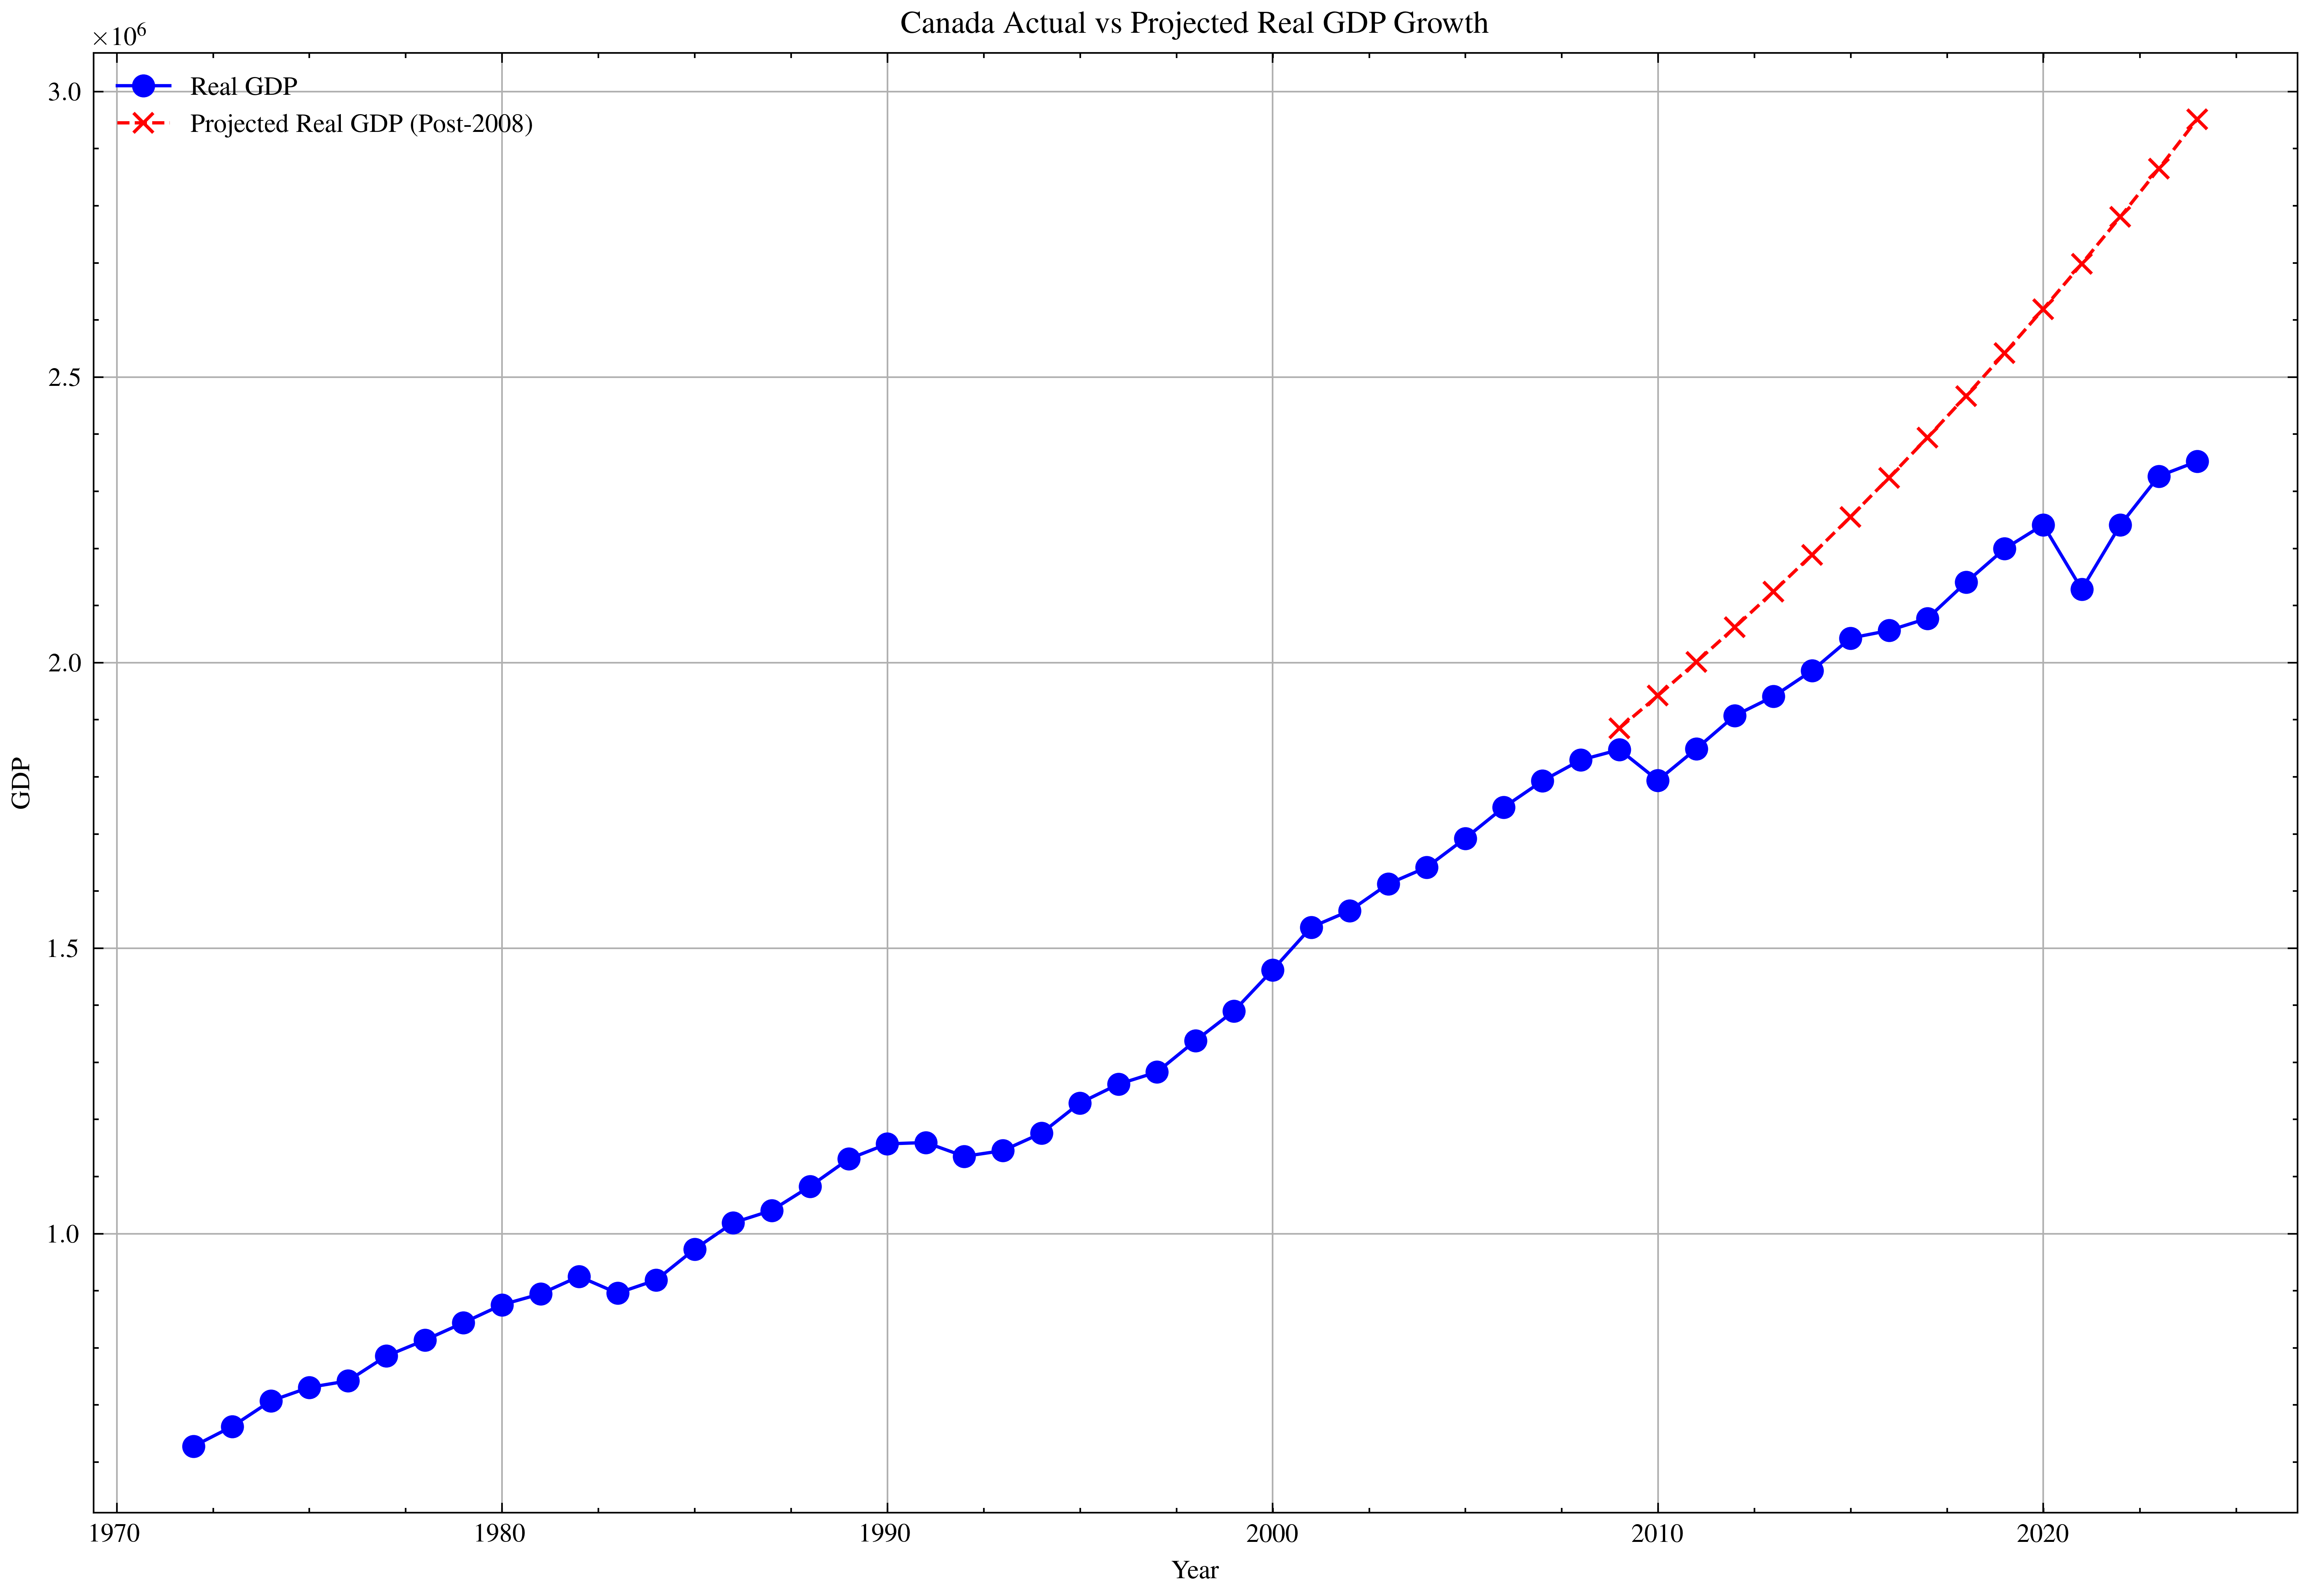

<Figure size 1980x1500 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

# Plotting the actual GDP values for the entire period and projected GDP values post-2008
plt.figure(figsize=(12, 8))
# Plot entire actual GDP
plt.plot(annual_gdp['DATE'], annual_gdp['REAL GDP'], 
         label='Real GDP', marker='o', color='blue')
# Plot projected GDP post-2008
plt.plot(post_2008_data['DATE'], post_2008_data['Projected GDP'], 
         label='Projected Real GDP (Post-2008)', linestyle='--', marker='x', color='red')

plt.title('Canada Actual vs Projected Real GDP Growth')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('Actual_vs_Projected_GDP_Growth.png')
